<a href="https://colab.research.google.com/github/irawan555/MachineLearningTasks/blob/main/11thWeekTasks/LeNet/Irawan_Mardiansyah_1103210174_TK4504_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Irawan Mardiansyah

NIM : 1103210174

Kelas : TK4504

Lecture : 11

Dataset: MNIST

Model: LeNet

Dokumentasi GPT : https://chatgpt.com/share/9c5baeda-e434-4d76-9099-8a216270a066

LeNet adalah arsitektur jaringan saraf konvolusional (Convolutional Neural Network atau CNN) yang dikembangkan oleh Yann LeCun, Léon Bottou, Yoshua Bengio, dan Patrick Haffner pada akhir 1980-an dan awal 1990-an.

Struktur LeNet
LeNet-5, yang merupakan versi paling terkenal dari arsitektur ini, terdiri dari tujuh lapisan (tidak termasuk lapisan input), termasuk lapisan konvolusi, lapisan pooling/subsampling, dan lapisan fully connected. Berikut adalah rincian setiap lapisan:

1. Input Layer:
Ukuran input adalah gambar grayscale 32x32 piksel. Ukuran ini lebih besar dari gambar MNIST (28x28) untuk memungkinkan penggunaan lapisan konvolusi dan pooling tanpa mengurangi ukuran gambar terlalu cepat.

2. C1 - First Convolutional Layer:
Lapisan ini memiliki 6 filter (kernel) berukuran 5x5 dengan stride 1. Lapisan ini menghasilkan 6 feature maps berukuran 28x28 (karena tidak ada padding).

3. S2 - First Subsampling (Pooling) Layer:
Lapisan ini adalah lapisan average pooling dengan ukuran kernel 2x2 dan stride 2. Lapisan ini mengurangi ukuran feature maps dari 28x28 menjadi 14x14.

4. C3 - Second Convolutional Layer:
Lapisan ini memiliki 16 filter berukuran 5x5 dengan koneksi parsial ke 6 feature maps dari lapisan sebelumnya. Lapisan ini menghasilkan 16 feature maps berukuran 10x10.

5. S4 - Second Subsampling (Pooling) Layer:
Lapisan ini adalah lapisan average pooling dengan ukuran kernel 2x2 dan stride 2. Lapisan ini mengurangi ukuran feature maps dari 10x10 menjadi 5x5.

6. C5 - Third Convolutional Layer:
Lapisan ini memiliki 120 filter berukuran 5x5 yang terhubung ke semua 16 feature maps dari lapisan sebelumnya. Hasilnya adalah 120 feature maps berukuran 1x1 (karena ukuran kernel sama dengan ukuran feature map).

7. F6 - Fully Connected Layer:
Lapisan ini memiliki 84 neuron yang sepenuhnya terhubung ke output dari lapisan sebelumnya.

8. Output Layer:
Lapisan output adalah lapisan fully connected dengan 10 neuron, sesuai dengan 10 kelas digit (0-9) dalam dataset MNIST.

# **1. Impor Library yang Dibutuhkan**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# **2. Muat dan Siapkan Dataset**

In [ ]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to the range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to match the input shape of the model (28, 28, 1)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]


# **3. Definisikan Model LeNet**

In [ ]:
def create_lenet_model():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model


# **4. Buat Model, Kompilasi, dan Latih**

In [ ]:
# Create the LeNet model
model = create_lenet_model()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2410 - accuracy: 0.9270 - val_loss: 0.1118 - val_accuracy: 0.9640
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0842 - accuracy: 0.9742 - val_loss: 0.0567 - val_accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0607 - accuracy: 0.9813 - val_loss: 0.0402 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0424 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0363 - val_accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0341 - val_accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0267 - accuracy: 0.9911 - val_loss: 0.0414 -

# **5. Visualisasi Model**

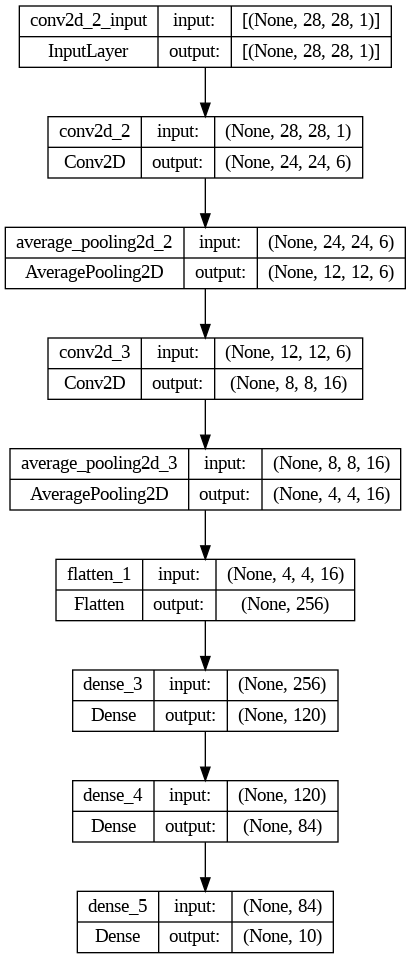

In [ ]:
# Visualize the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='lenet_model.png', show_shapes=True, show_layer_names=True)


# **6. Visualisasi Hasil Pelatihan**

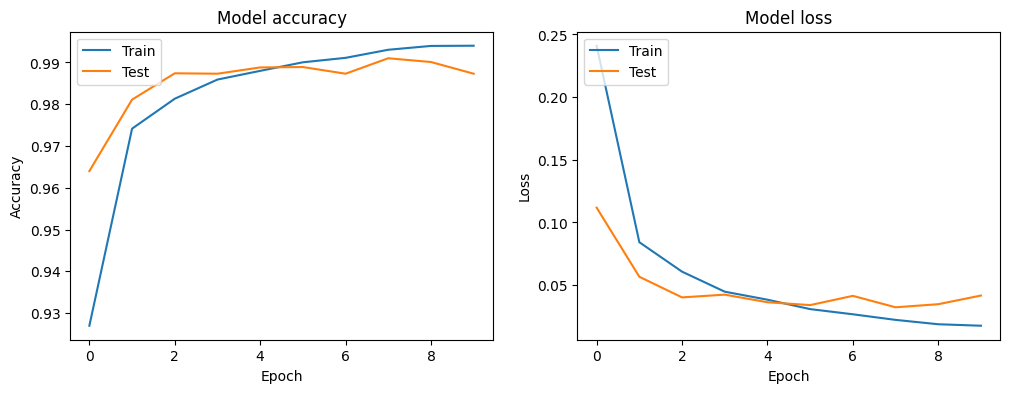

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
